In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

############################################################
q_values = ["0.01", "0.25",  "0.5", "0.75", "0.90", "0.95", "0.99"]
q_default = "0.99"

n_values = ["1000000", "5000000", "7500000", "10000000"]
n_default = "5000000"

d_values = ["1", "2", "3", "4", "5", "6", "7", "8"]
d_values_restrict = ["1","3","4","7"]
d_default = "1"

e_values = ["0.5", "1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", "5"]
e_default = ["1.0", "2.0", "3.0", "4.0", "5.0"]

s_base = 16033099
s_step = 127
reps = 100
############################################################

plt.rc('lines', linewidth=0.5, color='k')
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : '12'}
plt.rc('font', **font)
#plt.rcParams['font.sans-serif'] = ['Helvetica', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
plt.rcParams['savefig.bbox']='tight'

dist_name = ['normal', 'cauchy', 'uniform', 'exponential', 'chi squared', 'gamma', 'lognormal', 'extreme value']

from cycler import cycler

# # Create cycler object. Use any styling from above you please
monochrome = (cycler('color', ['k', 'k', 'k', 'k']) + cycler('linestyle', ['-','--', ':', '-.']) + cycler('marker', ['^', 'o', 'x', 's']))

color = (cycler('color', ['#785EF0', '#DC267F', '#FE6100', '#FFB000']) + cycler('linestyle', ['-', '-', '-', '-']) + cycler('marker', ['^', 'o', 'x', 's']))


In [2]:
distr_df_ezq = pd.read_csv('test_on_d_ezq-sw.csv')
distr_df_ldp = pd.read_csv('test_on_d_ldpq.csv')
distr_df_frugal1u = pd.read_csv('test_on_d_frugal1u-rr.csv')
distr_df_frugal2u = pd.read_csv('test_on_d_frugal2u-sw.csv')

In [3]:
import matplotlib.ticker as ticker
def plot_comp(d, ax):
    dx = distr_df_ezq[distr_df_ezq['d'] == d]['e']
    dy = distr_df_ezq[distr_df_ezq['d'] == d]['nae']
    el = distr_df_ezq[distr_df_ezq['d'] == d]['cil']
    er = distr_df_ezq[distr_df_ezq['d'] == d]['cir']
    ci = [el.to_numpy(),er.to_numpy()]

    d1x = distr_df_ldp[distr_df_ldp['d'] == d]['e']
    d1y = distr_df_ldp[distr_df_ldp['d'] == d]['nae']
    el1 = distr_df_ldp[distr_df_ldp['d'] == d]['cil']
    er1 = distr_df_ldp[distr_df_ldp['d'] == d]['cir']
    ci1 = [el1.to_numpy(),er1.to_numpy()]

    d2x = distr_df_frugal1u[distr_df_frugal1u['d'] == d]['e']
    d2y = distr_df_frugal1u[distr_df_frugal1u['d'] == d]['nae']
    el2 = distr_df_frugal1u[distr_df_frugal1u['d'] == d]['cil']
    er2 = distr_df_frugal1u[distr_df_frugal1u['d'] == d]['cir']
    ci2 = [el2.to_numpy(),er2.to_numpy()]
    
    d3x = distr_df_frugal2u[distr_df_frugal2u['d'] == d]['e']
    d3y = distr_df_frugal2u[distr_df_frugal2u['d'] == d]['nae']
    el3 = distr_df_frugal2u[distr_df_frugal2u['d'] == d]['cil']
    er3 = distr_df_frugal2u[distr_df_frugal2u['d'] == d]['cir']
    ci3 = [el3.to_numpy(),er3.to_numpy()]
    
    ax.set_title(f'Estimation error, quantile: 0.99, input distribution: {dist_name[d-1]}', fontsize=18, style='italic')
    ax.set_ylim([0,1])
    ax.set_prop_cycle(color)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax.xaxis.set_tick_params(width=0.5)
    ax.yaxis.set_tick_params(width=0.5)
    r = ax.errorbar(dx, dy, yerr=ci, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3,  capsize=3, label='ezq-sw')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d1x, d1y, yerr=ci1, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='ldpq')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d2x, d2y, yerr=ci2, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal1u-rr')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d3x, d3y, yerr=ci3, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal2u-sw')
    r[-1][0].set_linestyle('-.')
    ax.set_xlabel(r'Privacy budget $\epsilon$')
    ax.set_ylabel('Normalized abs error')
    ax.legend()
    ax.legend(frameon=False)
    [x.set_linewidth(0.5) for x in ax.spines.values()]
    #ax.tick_params(width=0.5)
    return ax

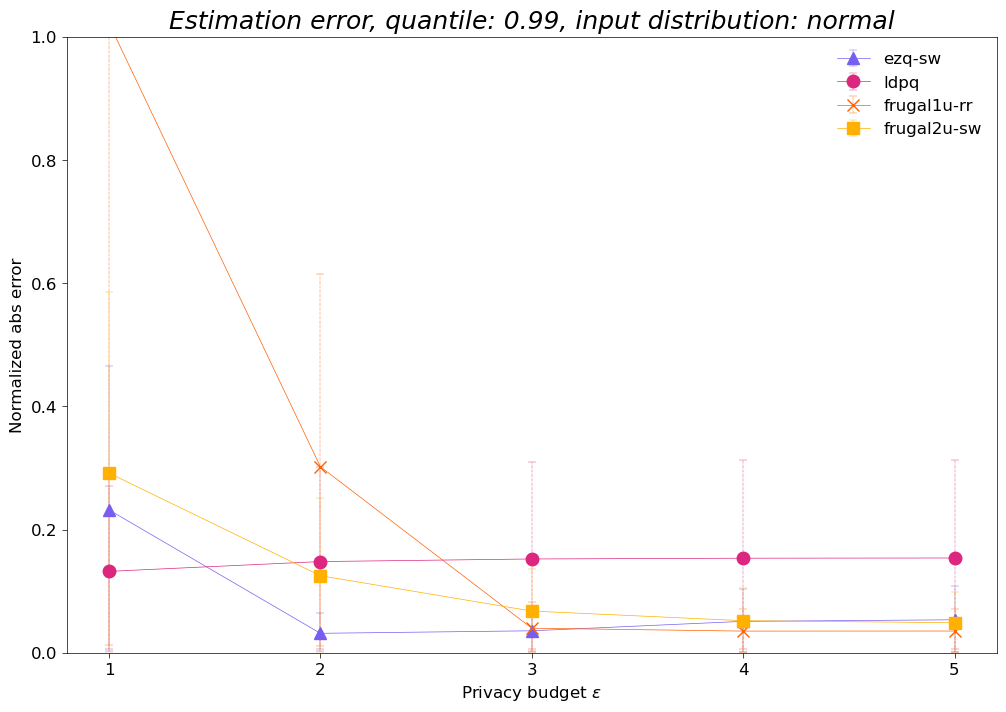

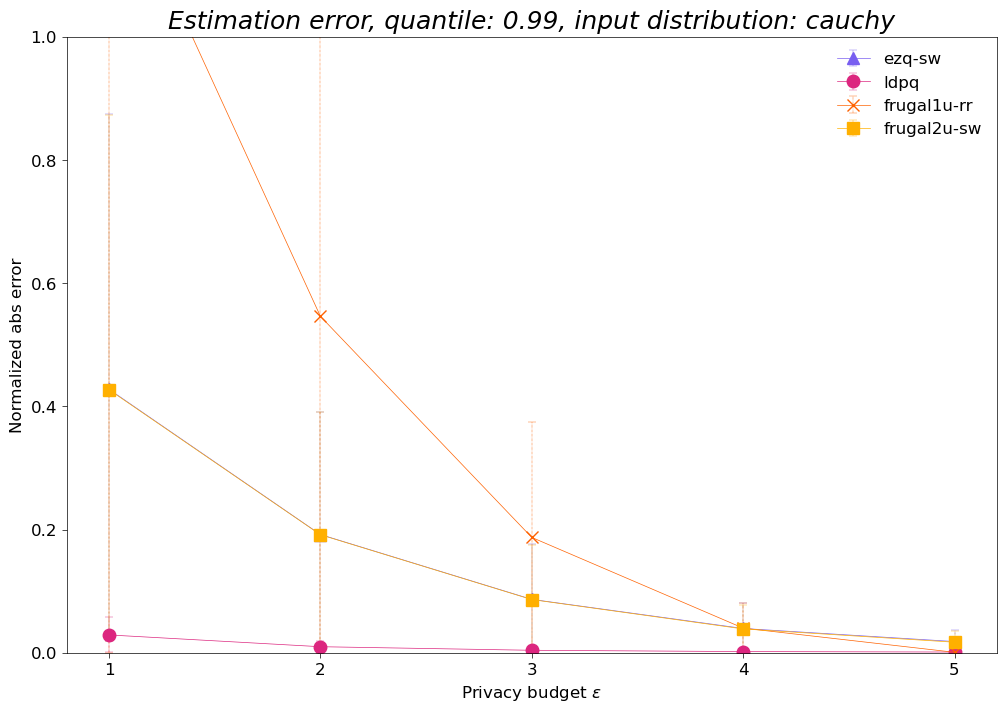

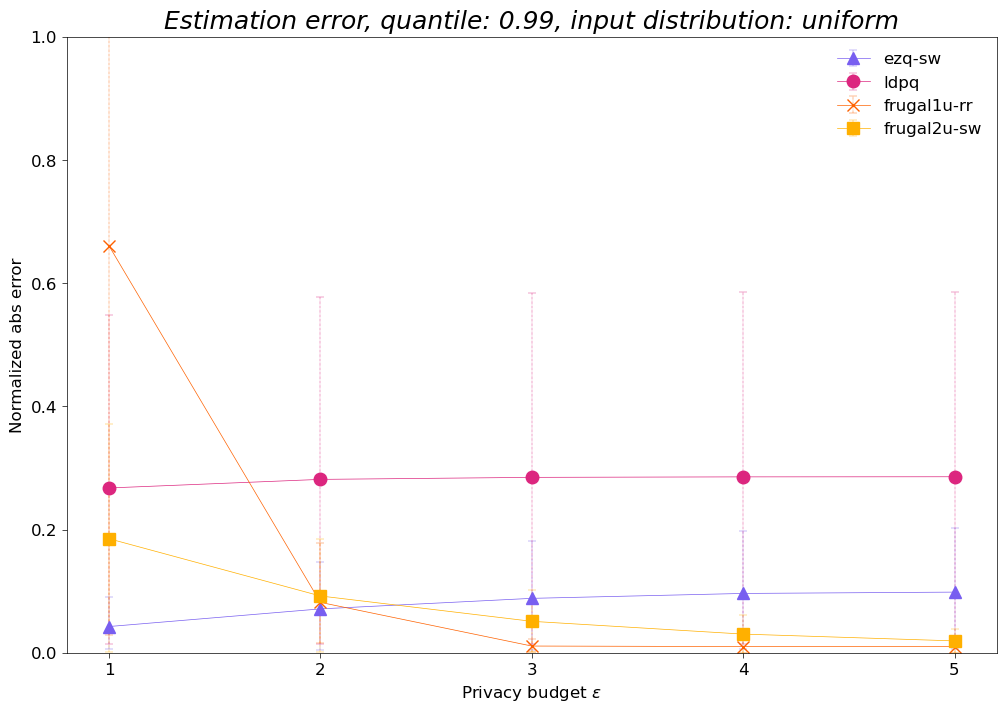

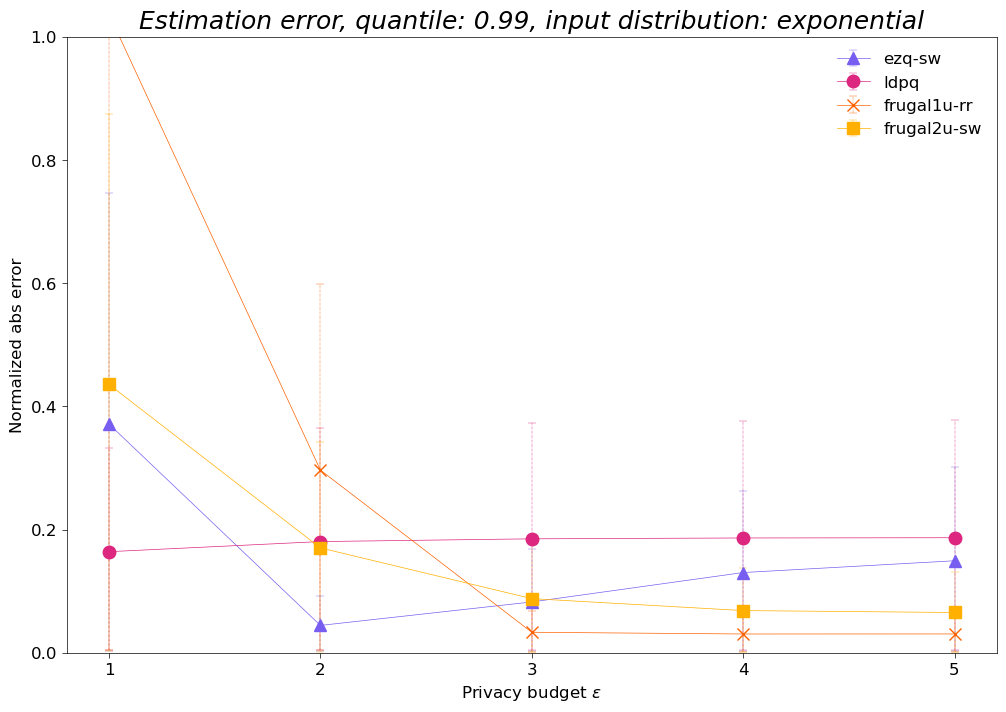

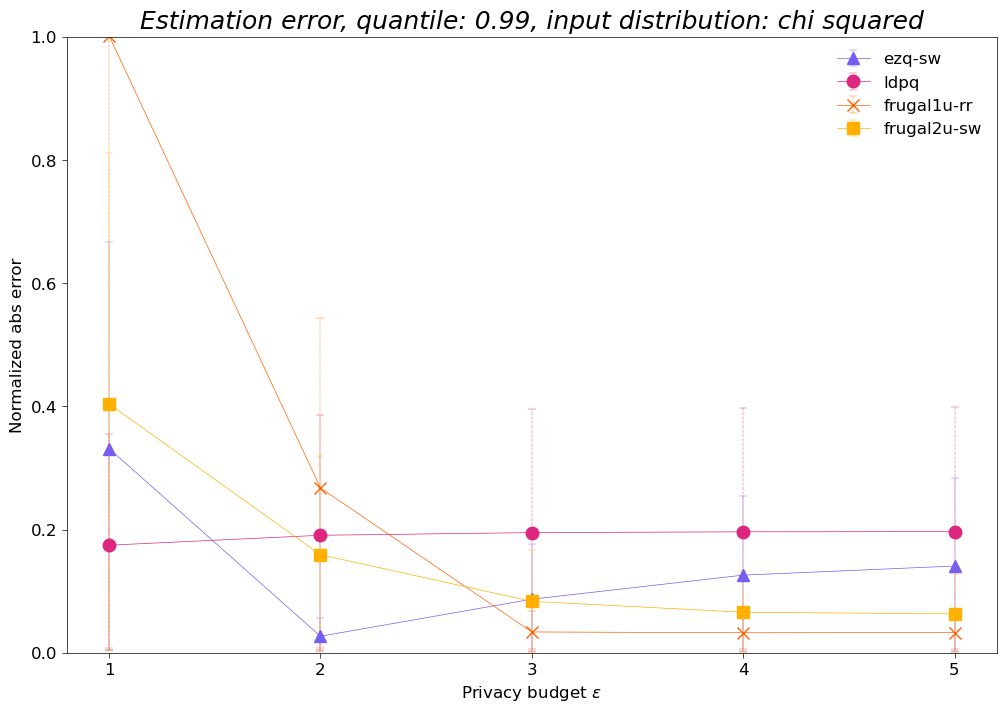

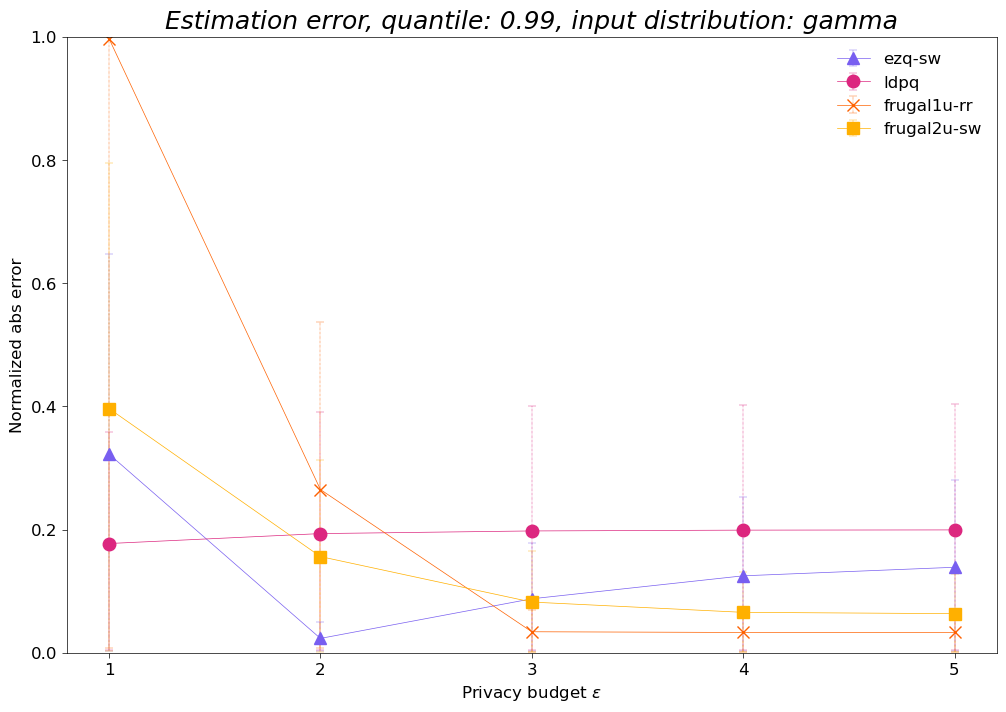

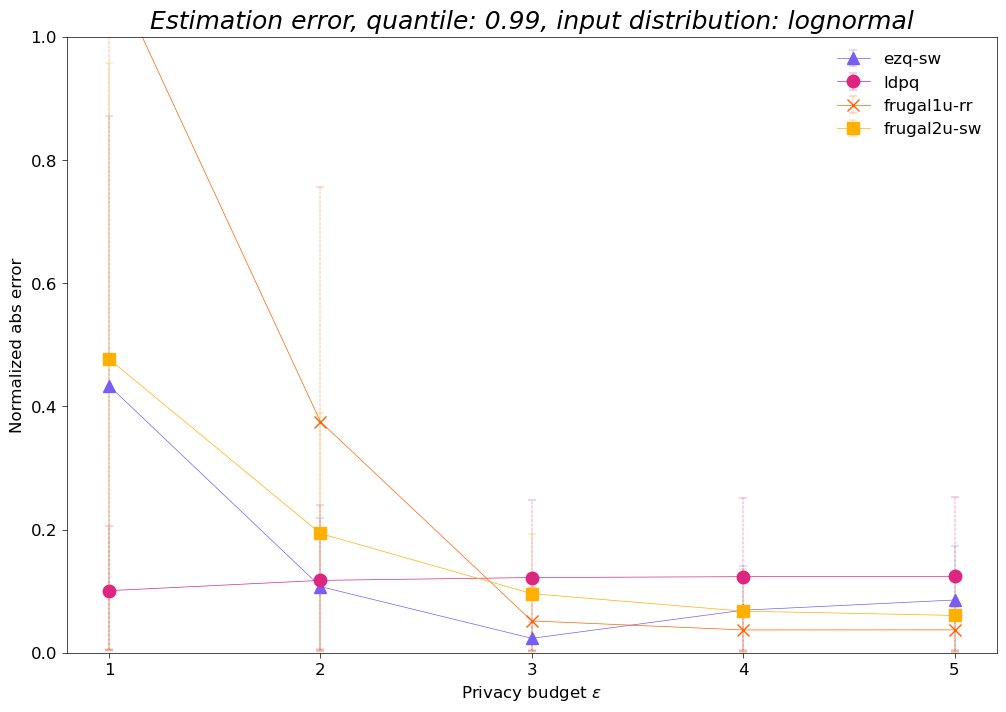

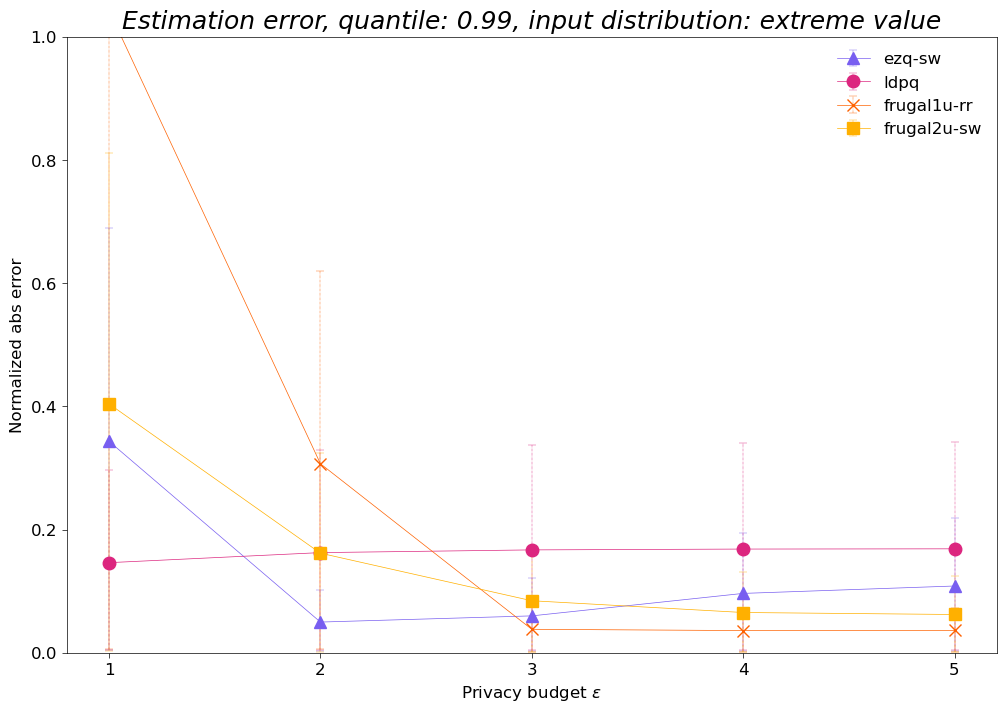

In [4]:
for i in range(1,9):
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    plot_comp(i,ax)
    fig.savefig(f'imgs/err_vs_budget_distro{i}.eps', dpi=600, bbox_inches='tight')
    plt.show()

In [5]:
e_df_ezq = pd.read_csv('test_on_e_ezq-sw.csv')
e_df_ldp = pd.read_csv('test_on_e_ldpq.csv')
e_df_frugal1u = pd.read_csv('test_on_e_frugal1u-rr.csv')
e_df_frugal2u = pd.read_csv('test_on_e_frugal2u-sw.csv')

In [6]:
def plot_comp_e(ax):
    dx = e_df_ezq['e']
    dy = e_df_ezq['nae']
    ci = [e_df_ezq['cil'].to_numpy(), e_df_ezq['cir'].to_numpy()]
    
    d1x = e_df_ldp['e']
    d1y = e_df_ldp['nae']
    ci1 = [e_df_ldp['cil'].to_numpy(), e_df_ldp['cir'].to_numpy()]

    d2x = e_df_frugal1u['e']
    d2y = e_df_frugal1u['nae']
    ci2 = [e_df_frugal1u['cil'].to_numpy(), e_df_frugal1u['cir'].to_numpy()]    

    d3x = e_df_frugal2u['e']
    d3y = e_df_frugal2u['nae']
    ci3 = [e_df_frugal2u['cil'].to_numpy(), e_df_frugal2u['cir'].to_numpy()]

    ax.set_title(f'Estimation error, quantile: 0.99, input distribution: normal', fontsize=18, style='italic')
    ax.set_ylim([0,1])
    ax.set_prop_cycle(color)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_tick_params(width=0.5)
    ax.yaxis.set_tick_params(width=0.5)
    r = ax.errorbar(dx, dy, yerr=ci, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3,  capsize=3, label='ezq-sw')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d1x, d1y, yerr=ci1, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='ldpq')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d2x, d2y, yerr=ci2, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal1u-rr')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d3x, d3y, yerr=ci3, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal2u-sw')
    r[-1][0].set_linestyle('-.')
    ax.set_xlabel(r'Privacy budget $\epsilon$')
    ax.set_ylabel('Normalized abs error')
    ax.legend()
    ax.legend(frameon=False)
    [x.set_linewidth(0.5) for x in ax.spines.values()]
    ax.tick_params(width=0.5)
    
    return ax

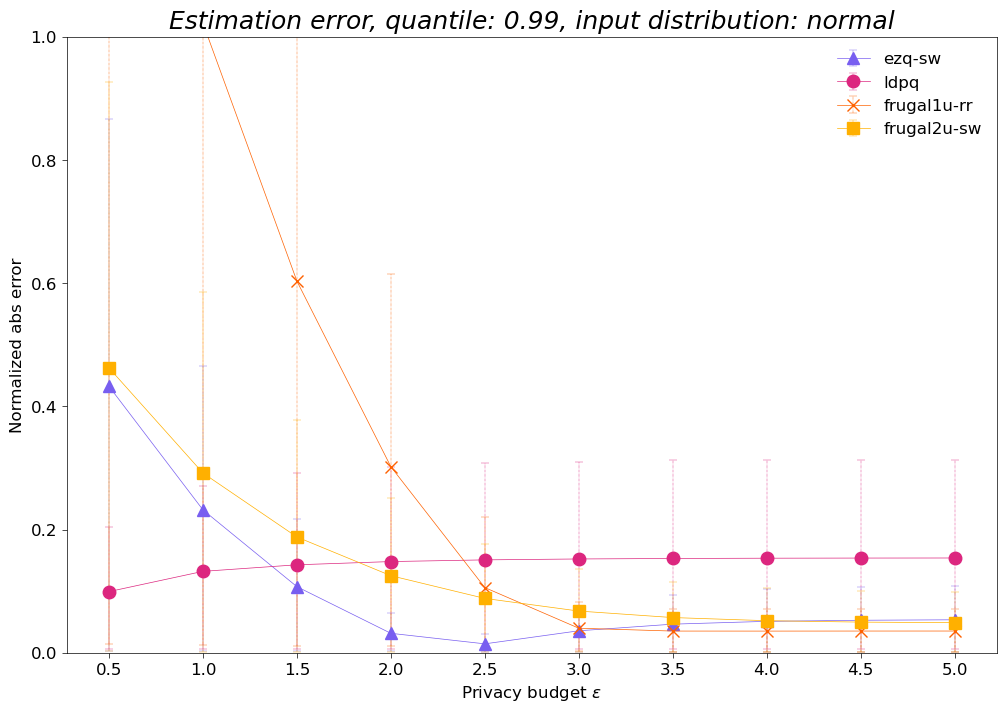

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
plot_comp_e(ax)
fig.savefig(f'imgs/err_vs_budget.eps', dpi=600)
plt.show()

In [8]:
n_df_ezq = pd.read_csv('test_on_n_ezq-sw.csv')
n_df_ldp = pd.read_csv('test_on_n_ldpq.csv')
n_df_frugal1u = pd.read_csv('test_on_n_frugal1u-rr.csv')
n_df_frugal2u = pd.read_csv('test_on_n_frugal2u-sw.csv')

In [9]:
def plot_comp_e(e, ax):
    dx = n_df_ezq[n_df_ezq['e'] == float(e)]['n']
    dy = n_df_ezq[n_df_ezq['e'] == float(e)]['nae']
    el = n_df_ezq[n_df_ezq['e'] == float(e)]['cil']
    er = n_df_ezq[n_df_ezq['e'] == float(e)]['cir']
    ci = [el.to_numpy(),er.to_numpy()]

    d1x = n_df_ldp[n_df_ldp['e'] == float(e)]['n']
    d1y = n_df_ldp[n_df_ldp['e'] == float(e)]['nae']
    el1 = n_df_ldp[n_df_ldp['e'] == float(e)]['cil']
    er1 = n_df_ldp[n_df_ldp['e'] == float(e)]['cir']
    ci1 = [el1.to_numpy(),er1.to_numpy()]

    d2x = n_df_frugal1u[n_df_frugal1u['e'] == float(e)]['n']
    d2y = n_df_frugal1u[n_df_frugal1u['e'] == float(e)]['nae']
    el2 = n_df_frugal1u[n_df_frugal1u['e'] == float(e)]['cil']
    er2 = n_df_frugal1u[n_df_frugal1u['e'] == float(e)]['cir']
    ci2 = [el2.to_numpy(),er2.to_numpy()]

    d3x = n_df_frugal2u[n_df_frugal2u['e'] == float(e)]['n']
    d3y = n_df_frugal2u[n_df_frugal2u['e'] == float(e)]['nae']
    el3 = n_df_frugal2u[n_df_frugal2u['e'] == float(e)]['cil']
    er3 = n_df_frugal2u[n_df_frugal2u['e'] == float(e)]['cir']
    ci3 = [el3.to_numpy(),er3.to_numpy()]
    
    ax.set_title(f'Estimation error, quantile: 0.99, $\\epsilon$: {e}, input distribution: normal', fontsize=18, style='italic')
    ax.set_ylim([0,1])
    ax.set_prop_cycle(color)
    ax.set_xticks([1000000, 5000000, 7500000, 10000000])
    ax.xaxis.set_tick_params(width=0.5)
    ax.yaxis.set_tick_params(width=0.5)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    r = ax.errorbar(dx, dy, yerr=ci, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3,  capsize=3, label='ezq-sw')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d1x, d1y, yerr=ci1, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='ldpq')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d2x, d2y, yerr=ci2, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal1u-rr')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d3x, d3y, yerr=ci3, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal2u-sw')
    r[-1][0].set_linestyle('-.')
    ax.set_xlabel('Stream length')
    ax.set_ylabel('Normalized abs error')
    ax.legend()
    ax.legend(frameon=False)
    [x.set_linewidth(0.5) for x in ax.spines.values()]
    
    return ax

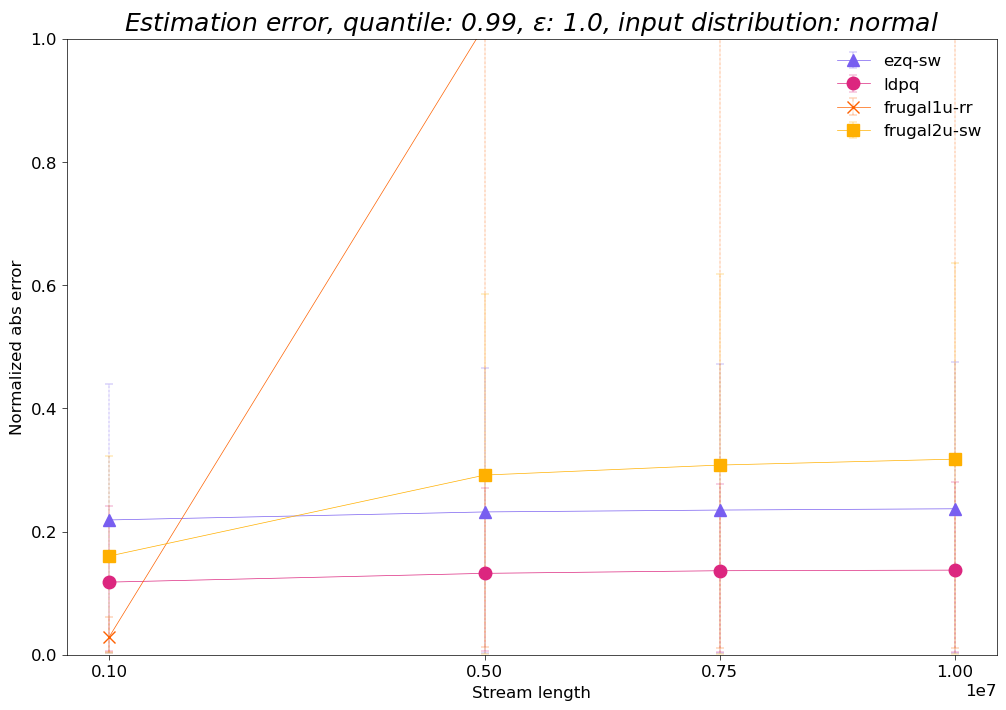

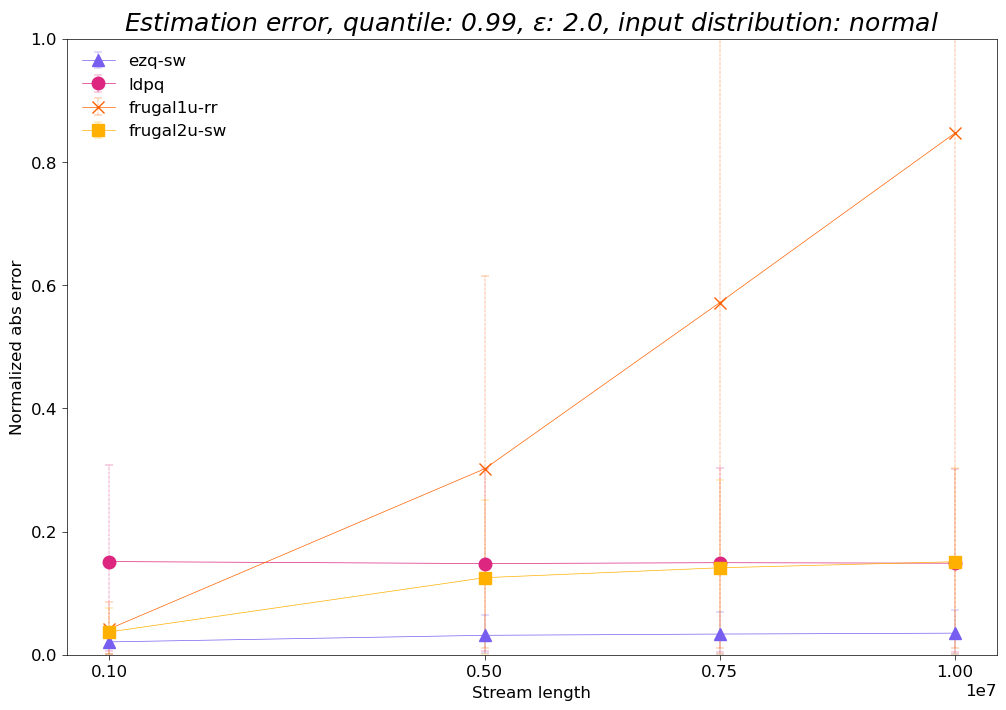

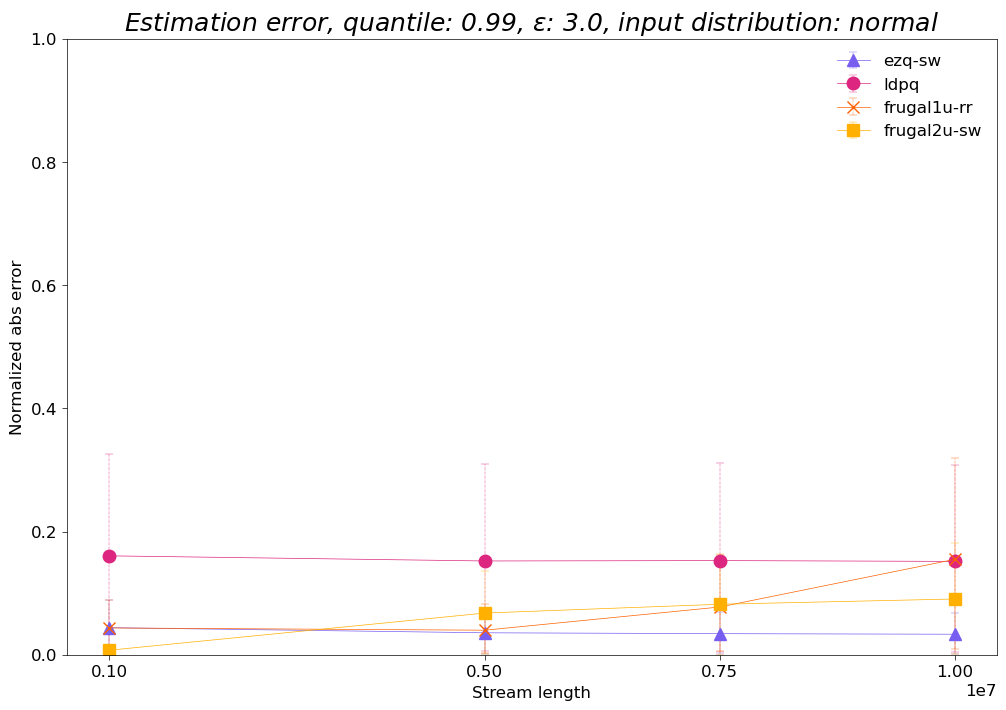

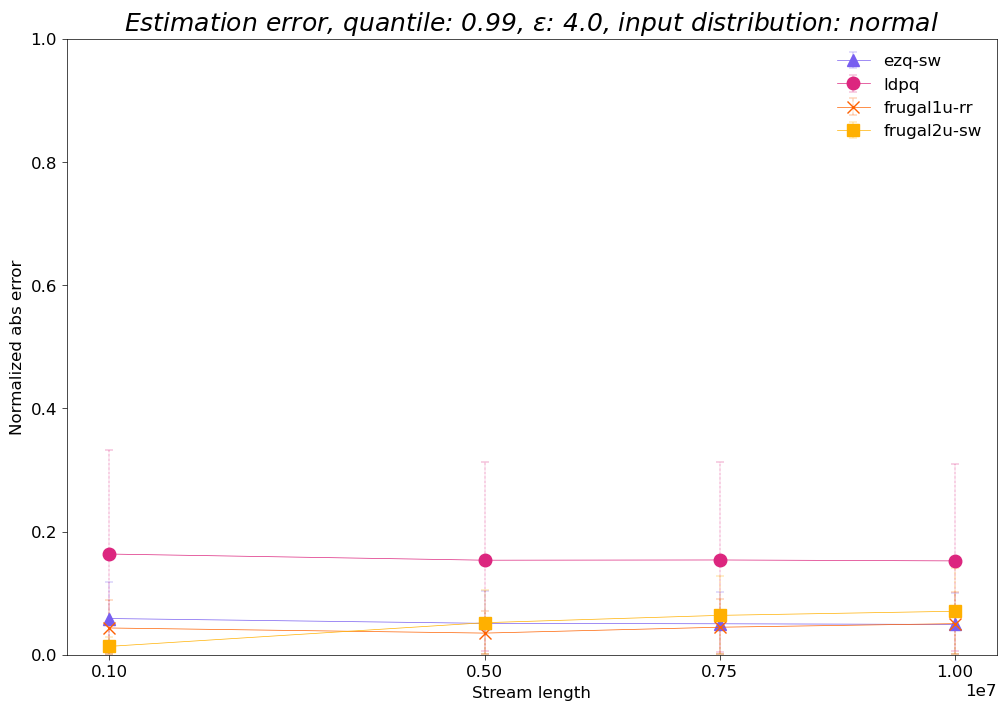

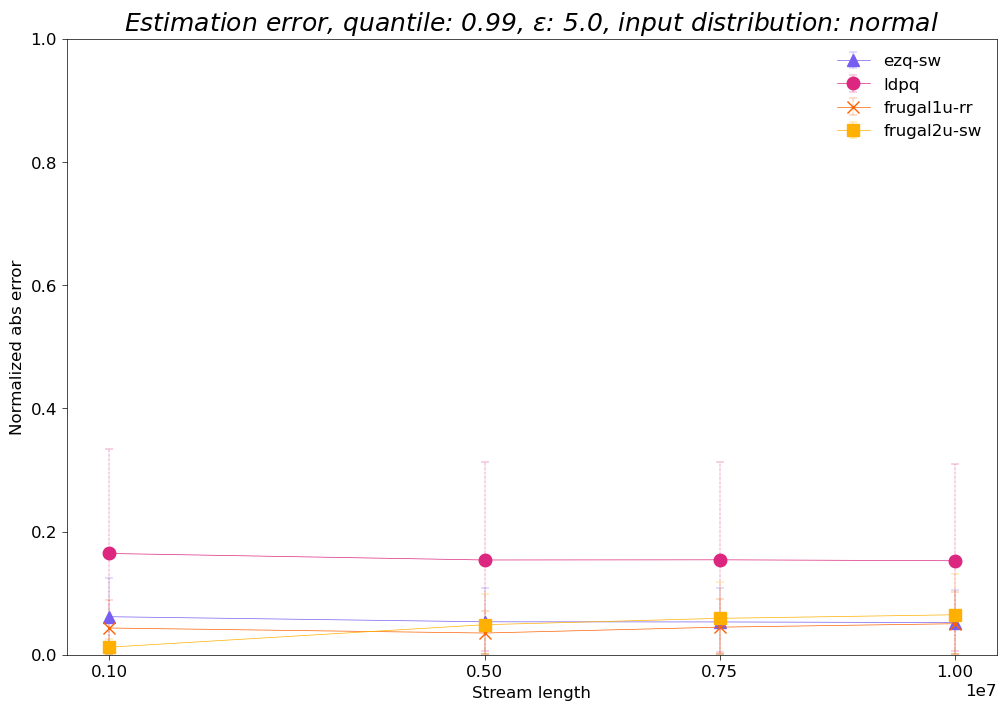

In [10]:
for i in range(0,5):
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    plot_comp_e(e_default[i],ax)
    fig.savefig(f'imgs/err_vs_length_budget{e_default[i]}.eps', dpi=600)
    plt.show()

In [11]:
q_df_ezq = pd.read_csv('test_on_q_ezq-sw.csv')
q_df_ldp = pd.read_csv('test_on_q_ldpq.csv')
q_df_frugal1u = pd.read_csv('test_on_q_frugal1u-rr.csv')
q_df_frugal2u = pd.read_csv('test_on_q_frugal2u-sw.csv')

def plot_comp_q(e, d, ax):
    dx = q_df_ezq[(q_df_ezq['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['q']
    dy = q_df_ezq[(q_df_ezq['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['nae']
    el = q_df_ezq[(q_df_ezq['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['cil']
    er = q_df_ezq[(q_df_ezq['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['cir']
    ci = [el.to_numpy(),er.to_numpy()]
    
    d1x = q_df_ldp[(q_df_ldp['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['q']
    d1y = q_df_ldp[(q_df_ldp['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['nae']
    el1 = q_df_ldp[(q_df_ldp['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['cil']
    er1 = q_df_ldp[(q_df_ldp['e'] == float(e)) & (q_df_ezq['d'] == float(d))]['cir']
    ci1 = [el1.to_numpy(),er1.to_numpy()]

    d2x = q_df_frugal1u[(q_df_frugal1u['e'] == float(e)) & (q_df_frugal1u['d'] == float(d))]['q']
    d2y = q_df_frugal1u[(q_df_frugal1u['e'] == float(e)) & (q_df_frugal1u['d'] == float(d))]['nae']
    el2 = q_df_frugal1u[(q_df_frugal1u['e'] == float(e)) & (q_df_frugal1u['d'] == float(d))]['cil']
    er2 = q_df_frugal1u[(q_df_frugal1u['e'] == float(e)) & (q_df_frugal1u['d'] == float(d))]['cir']
    ci2 = [el2.to_numpy(),er2.to_numpy()]

    d3x = q_df_frugal2u[(q_df_frugal2u['e'] == float(e)) & (q_df_frugal2u['d'] == float(d))]['q']
    d3y = q_df_frugal2u[(q_df_frugal2u['e'] == float(e)) & (q_df_frugal2u['d'] == float(d))]['nae']
    el3 = q_df_frugal2u[(q_df_frugal2u['e'] == float(e)) & (q_df_frugal2u['d'] == float(d))]['cil']
    er3 = q_df_frugal2u[(q_df_frugal2u['e'] == float(e)) & (q_df_frugal2u['d'] == float(d))]['cir']
    ci3 = [el3.to_numpy(),er3.to_numpy()]

    #fig, ax = plt.subplots()
    ax.set_title(f'Estimation error, $\\epsilon$: {e}, distribution: {dist_name[d-1]}', fontsize=18, style='italic')
    ax.set_ylim([0,1])
    ax.set_prop_cycle(color)
    ax.xaxis.set_tick_params(width=0.5, labelsize=10)
    ax.yaxis.set_tick_params(width=0.5, labelsize=10)
    ax.set_xticks([0.01, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    r = ax.errorbar(dx, dy, yerr=ci, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3,  capsize=3, label='ezq-sw')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d1x, d1y, yerr=ci1, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='ldpq')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d2x, d2y, yerr=ci2, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal1u-rr')
    r[-1][0].set_linestyle('-.')
    r = ax.errorbar(d3x, d3y, yerr=ci3, markersize=9, linewidth=0.5, elinewidth=0.3, capthick=0.3, capsize=3, label='frugal2u-sw')
    r[-1][0].set_linestyle('-.')
    
    ax.set_xlabel('Quantile')
    ax.set_ylabel('Normalized abs err')
    ax.legend()
    ax.legend(frameon=False)
    [x.set_linewidth(0.5) for x in ax.spines.values()]
    return ax

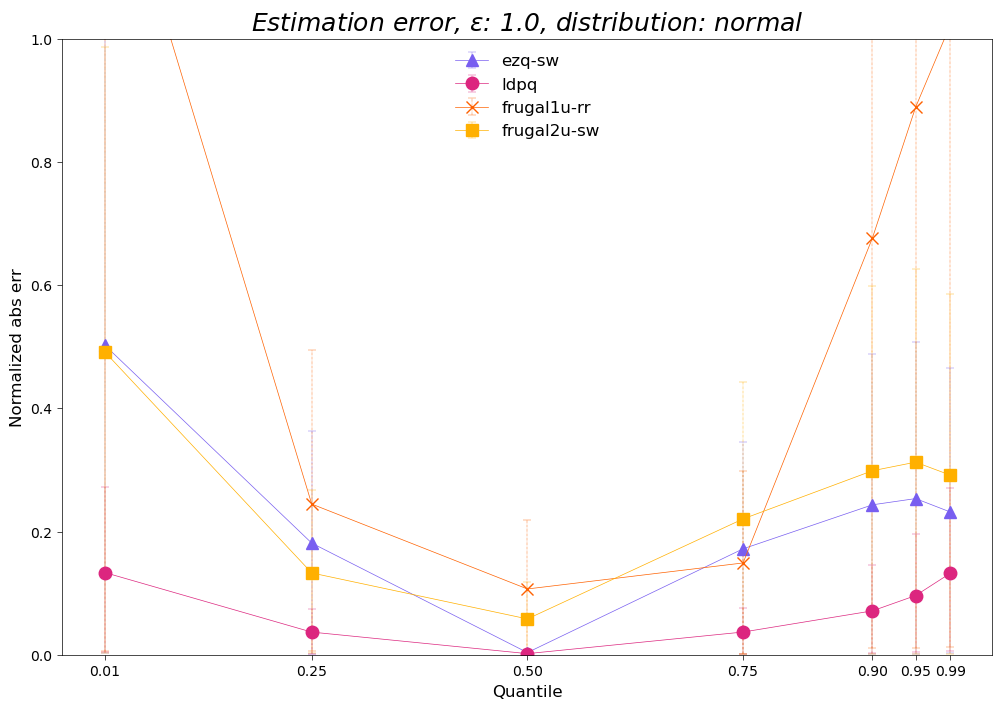

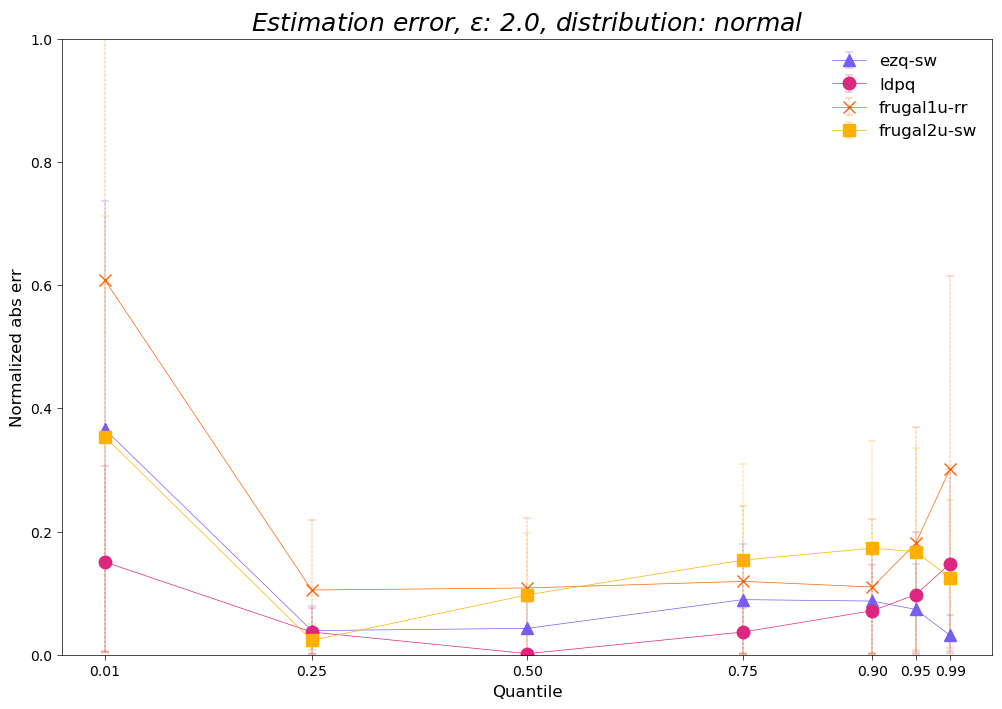

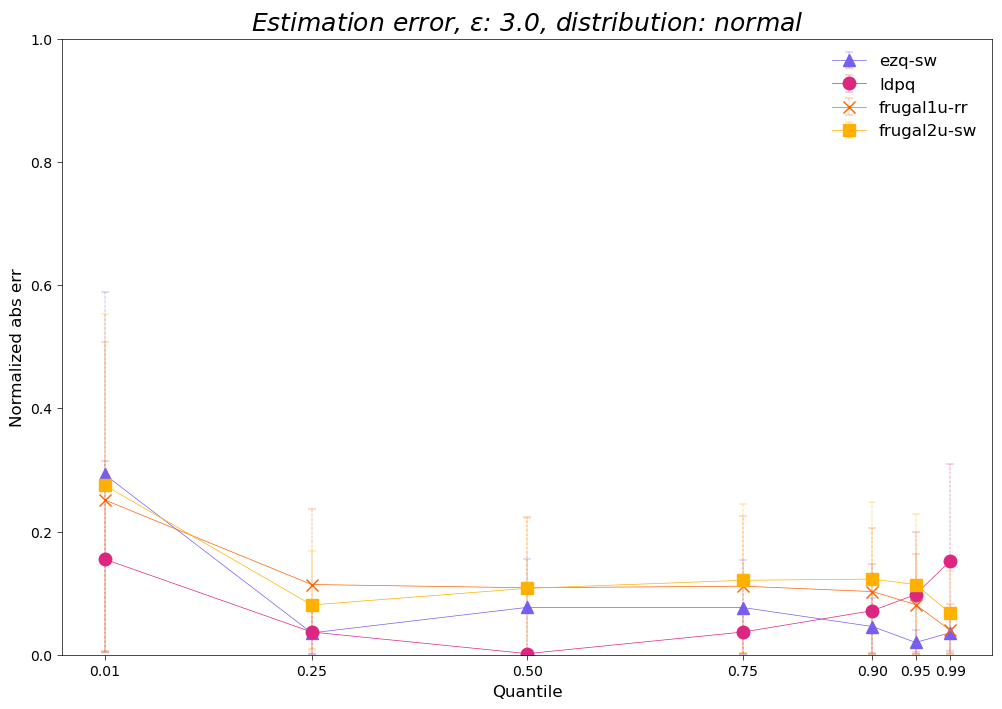

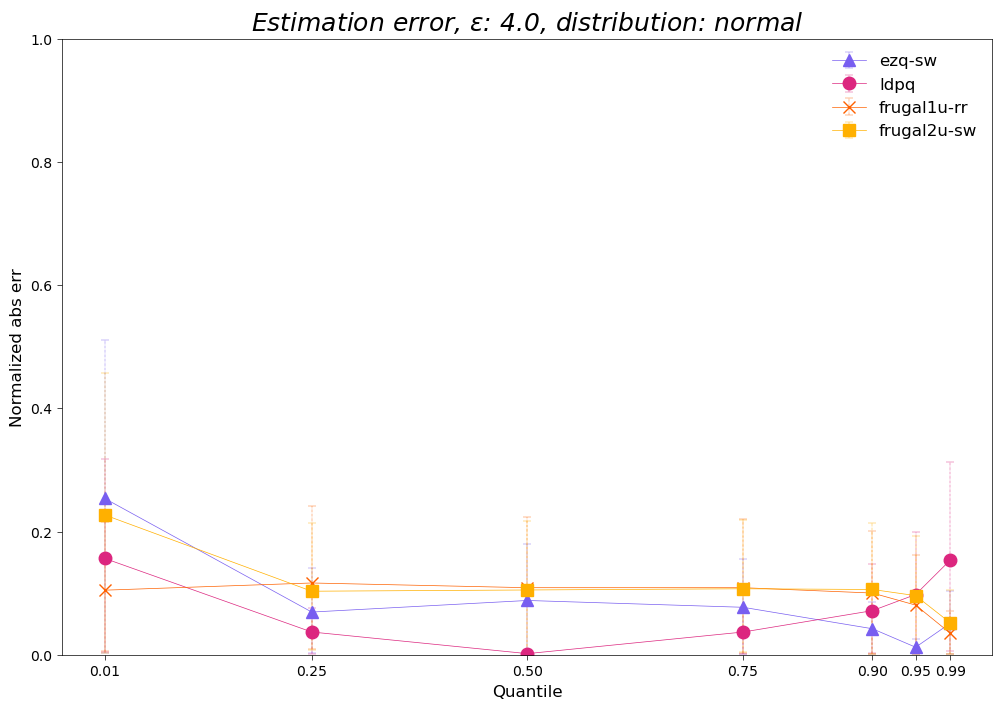

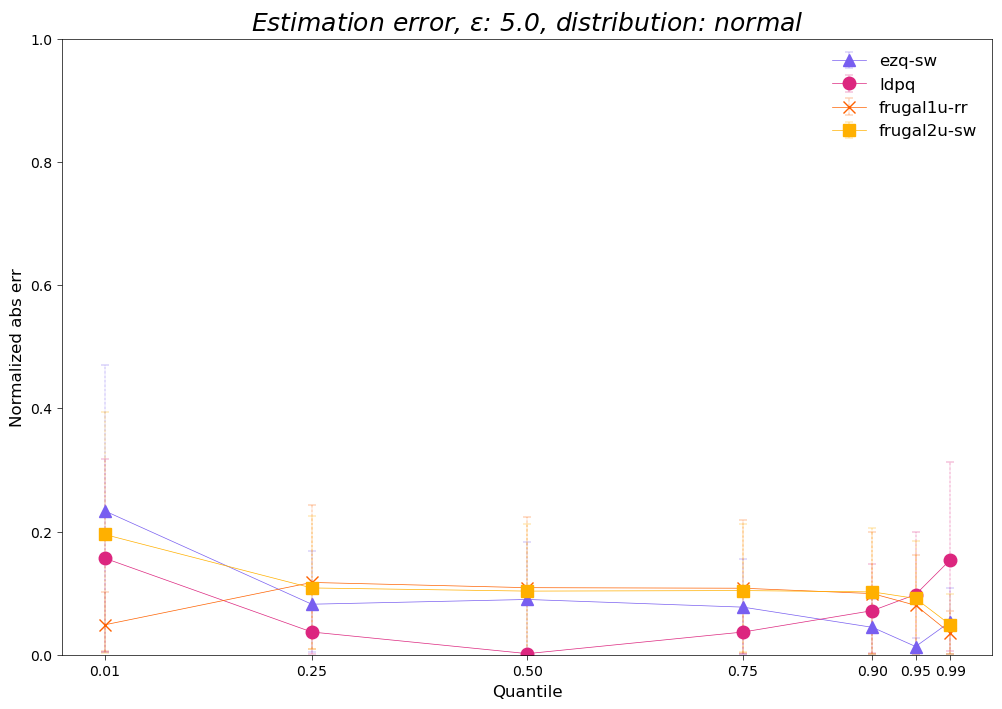

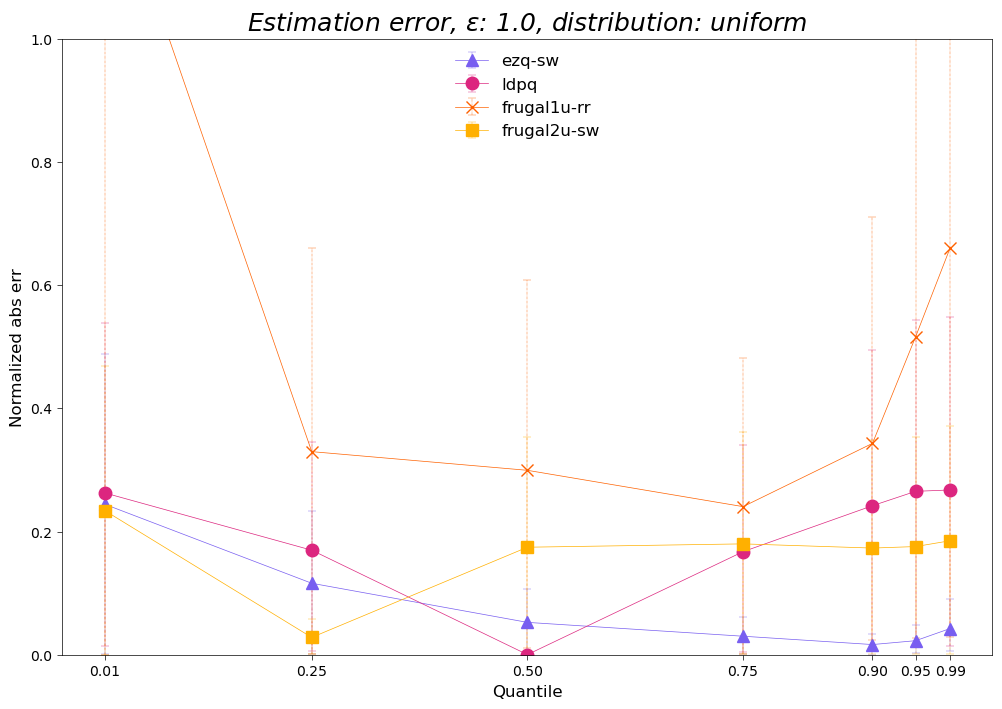

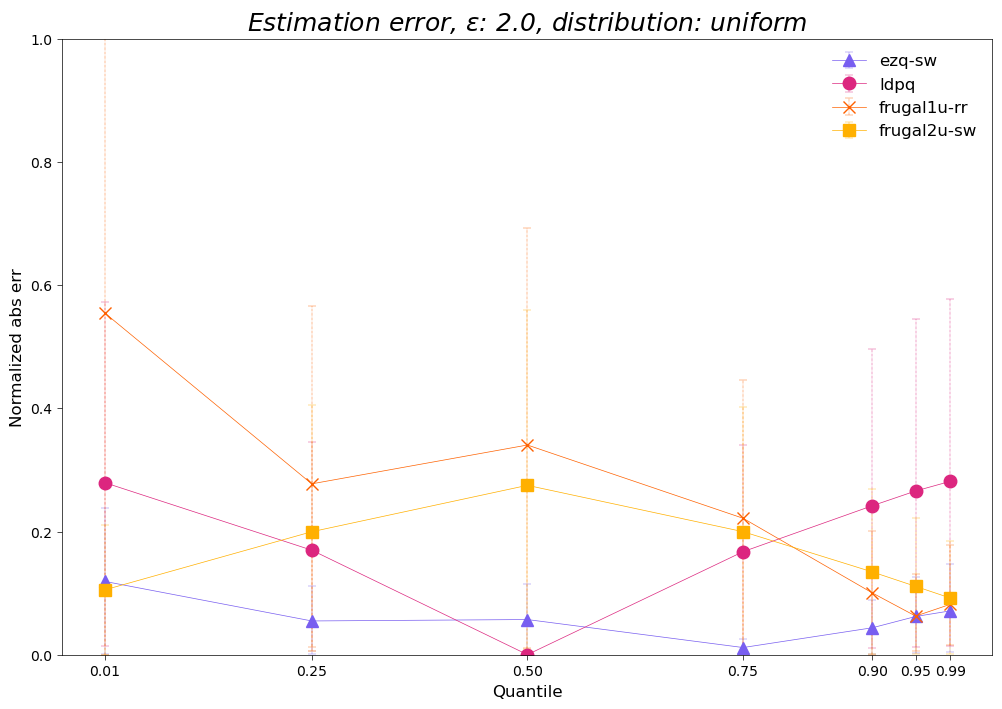

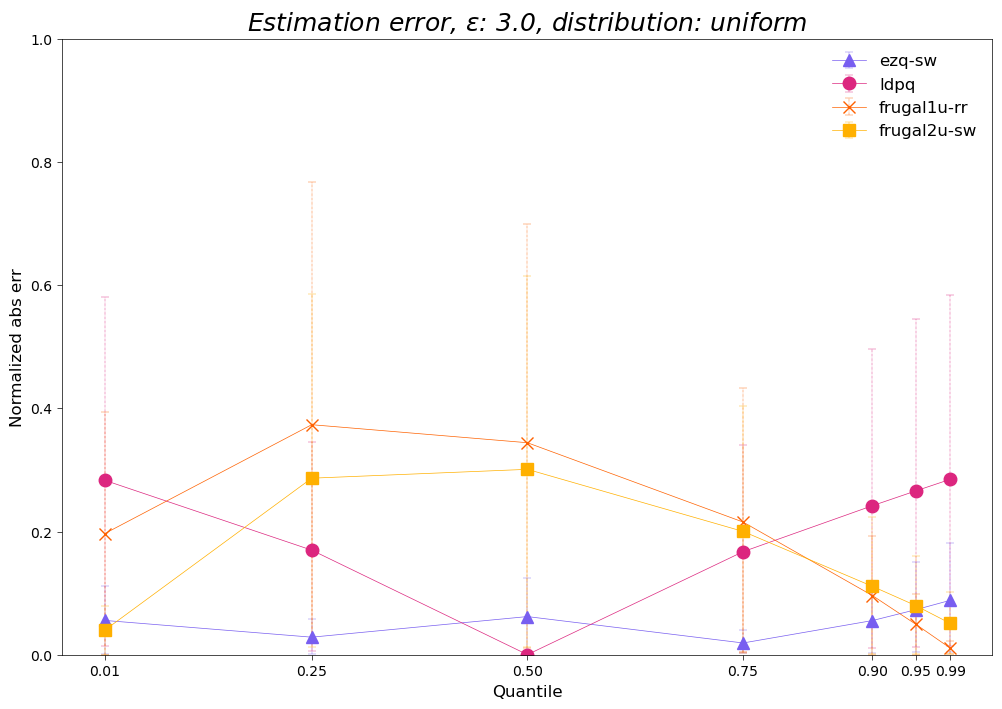

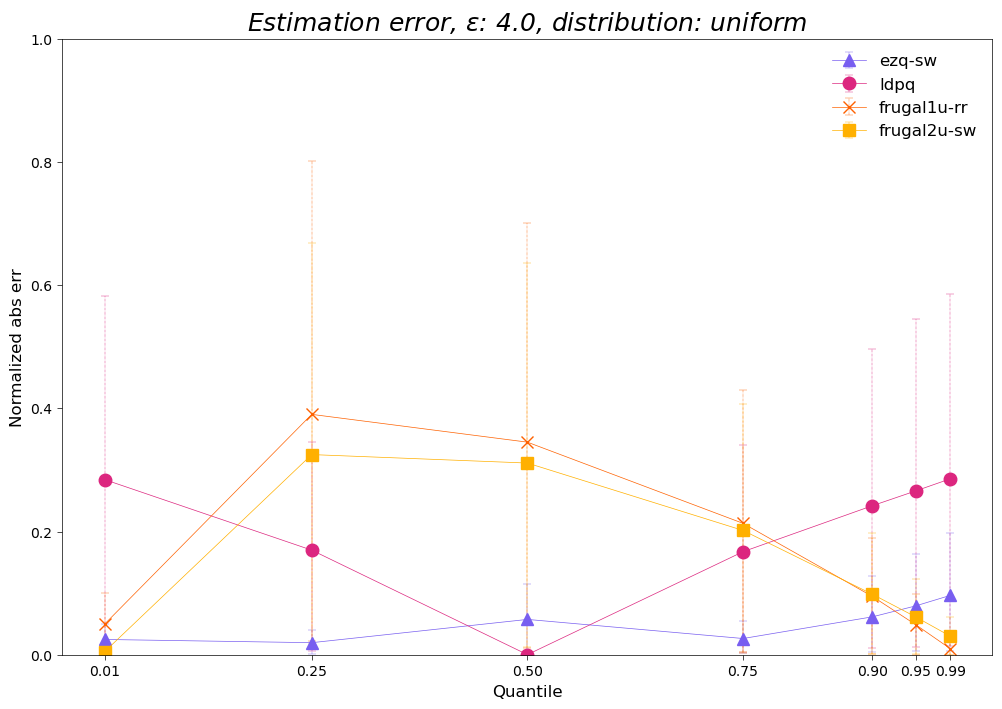

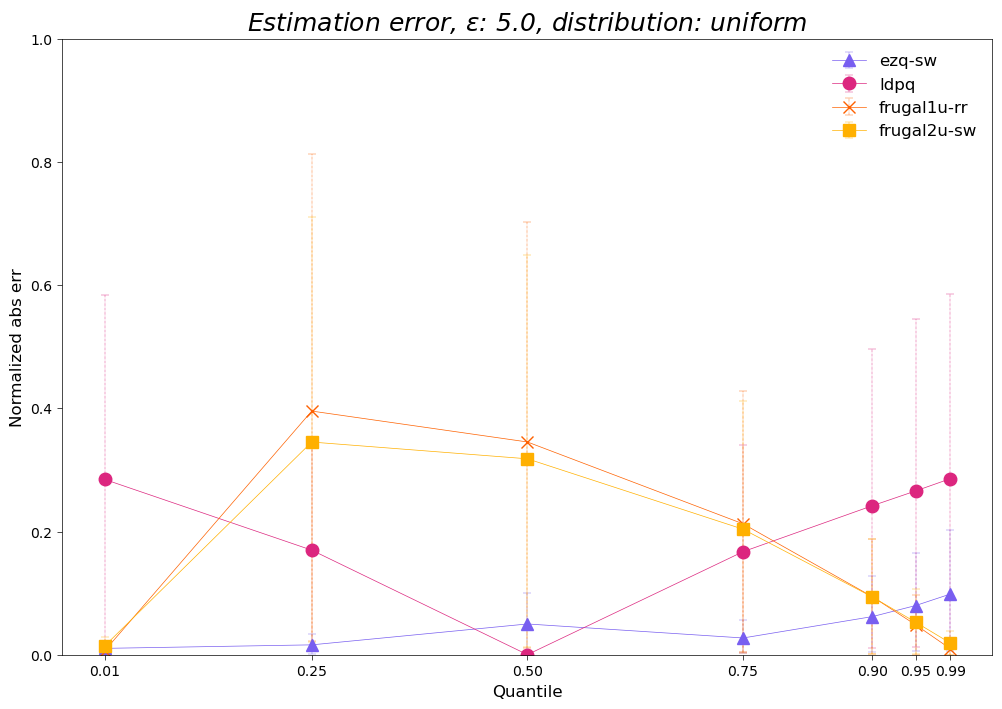

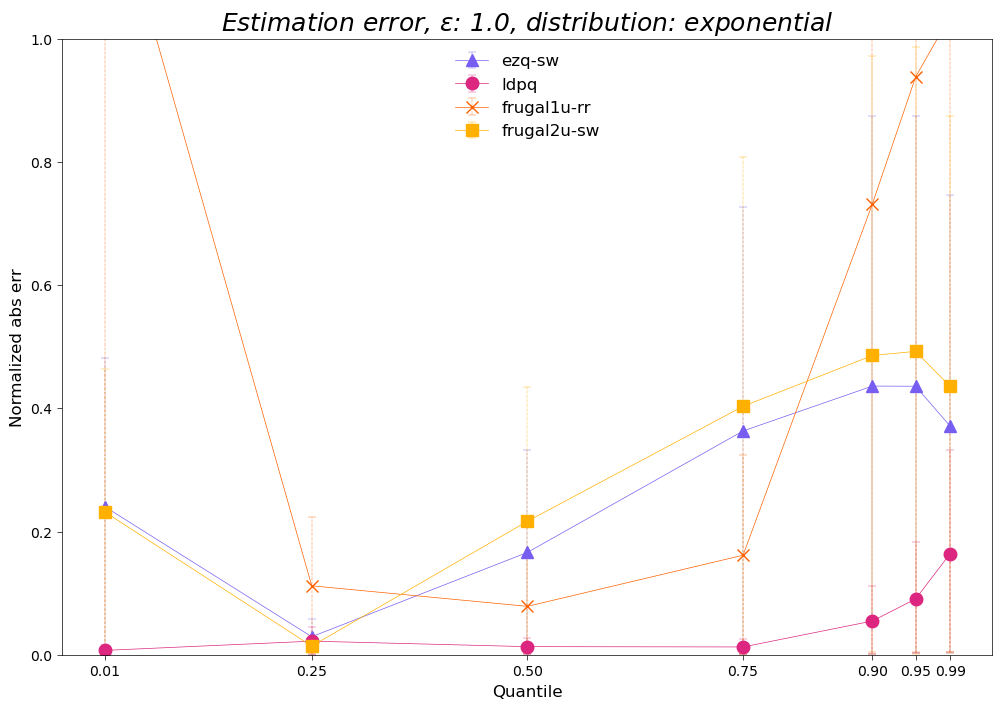

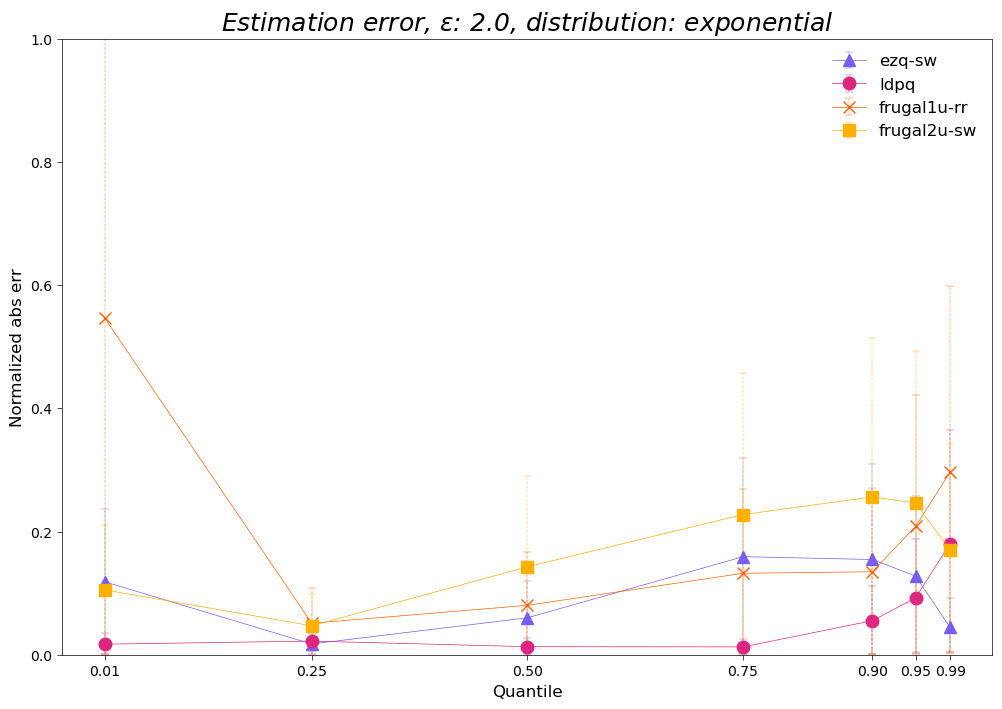

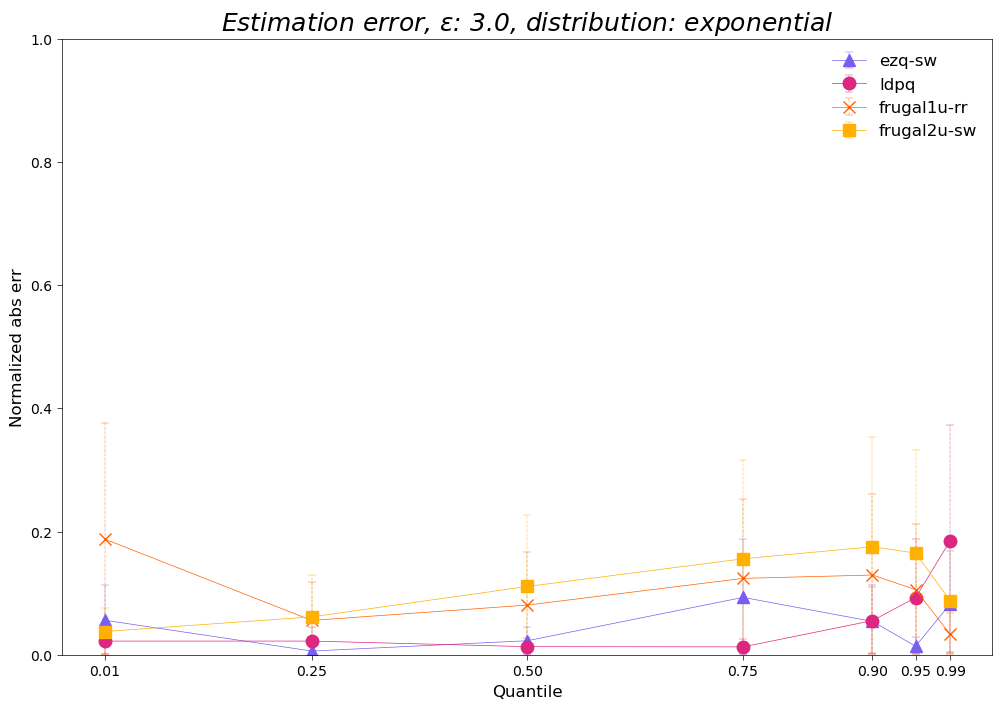

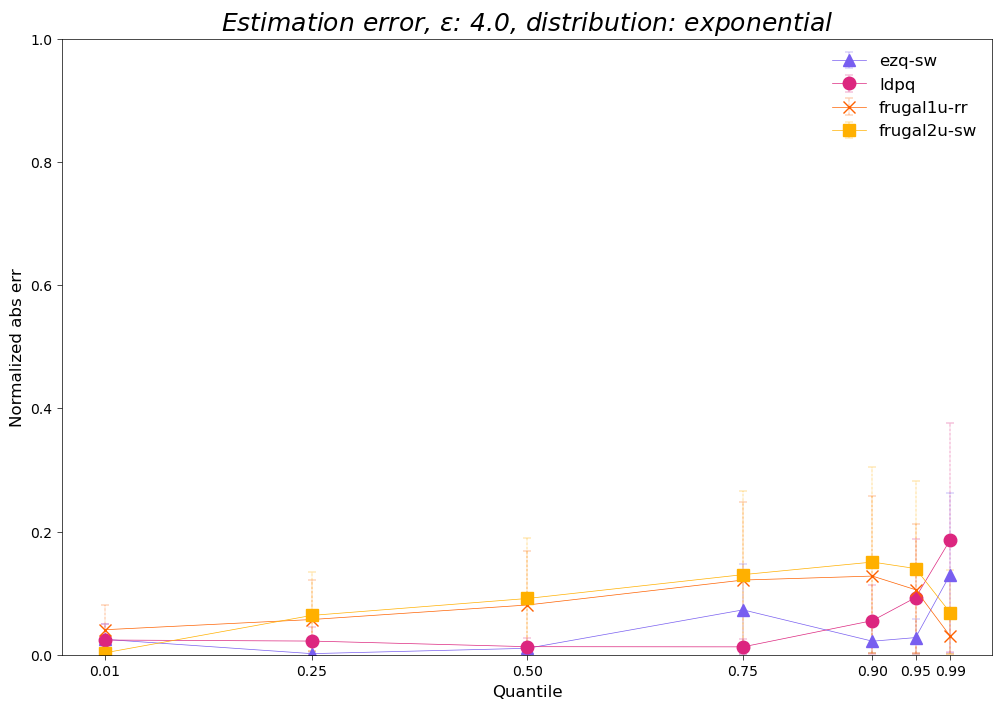

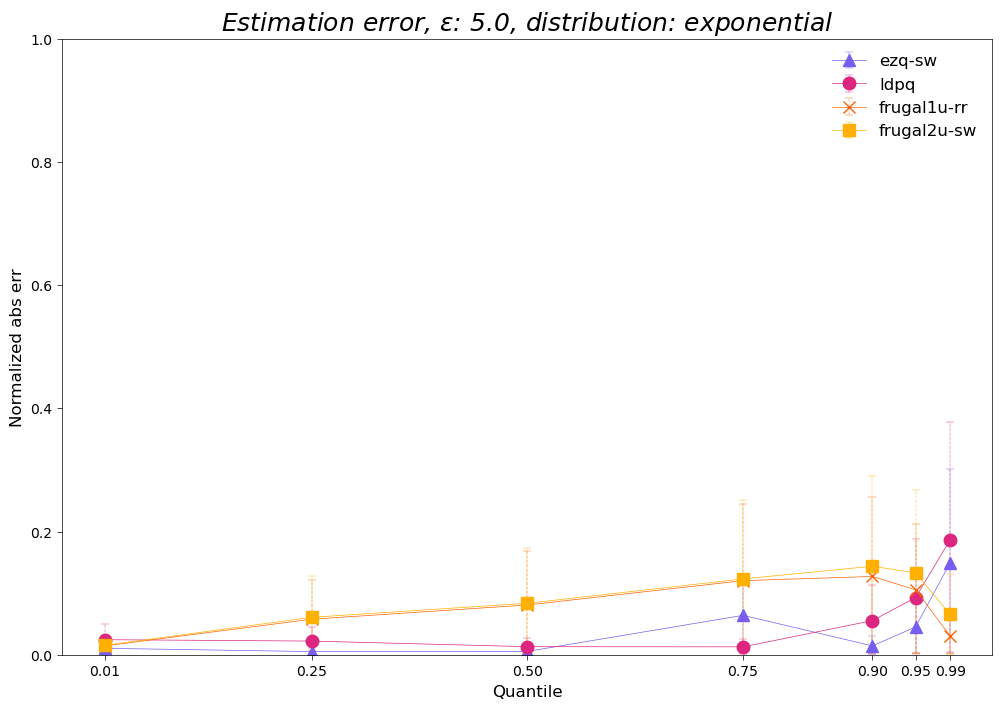

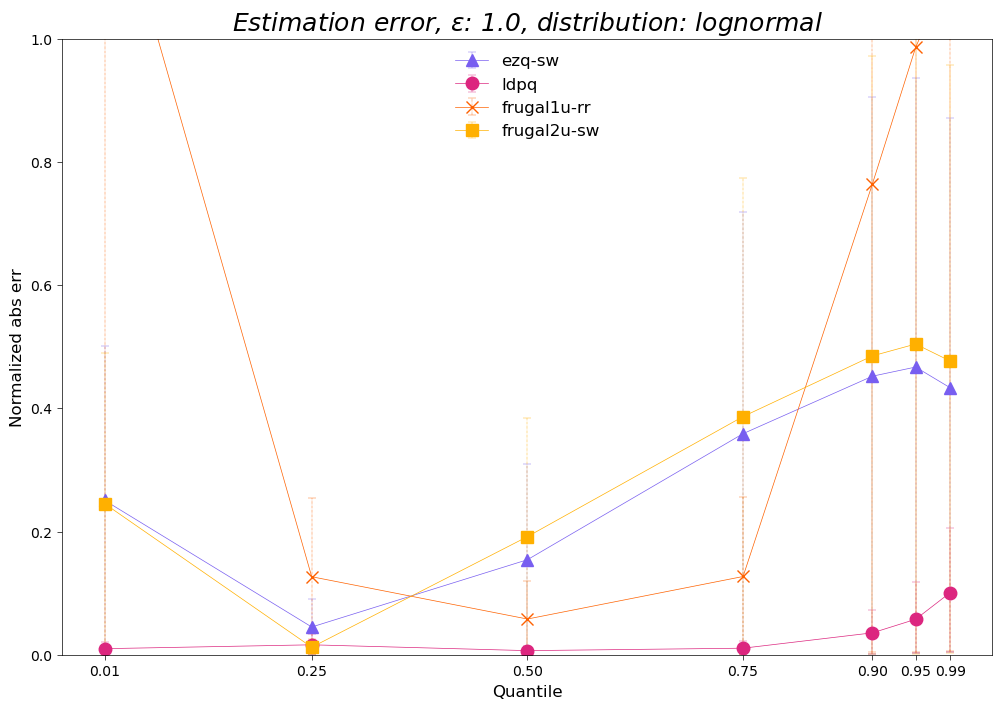

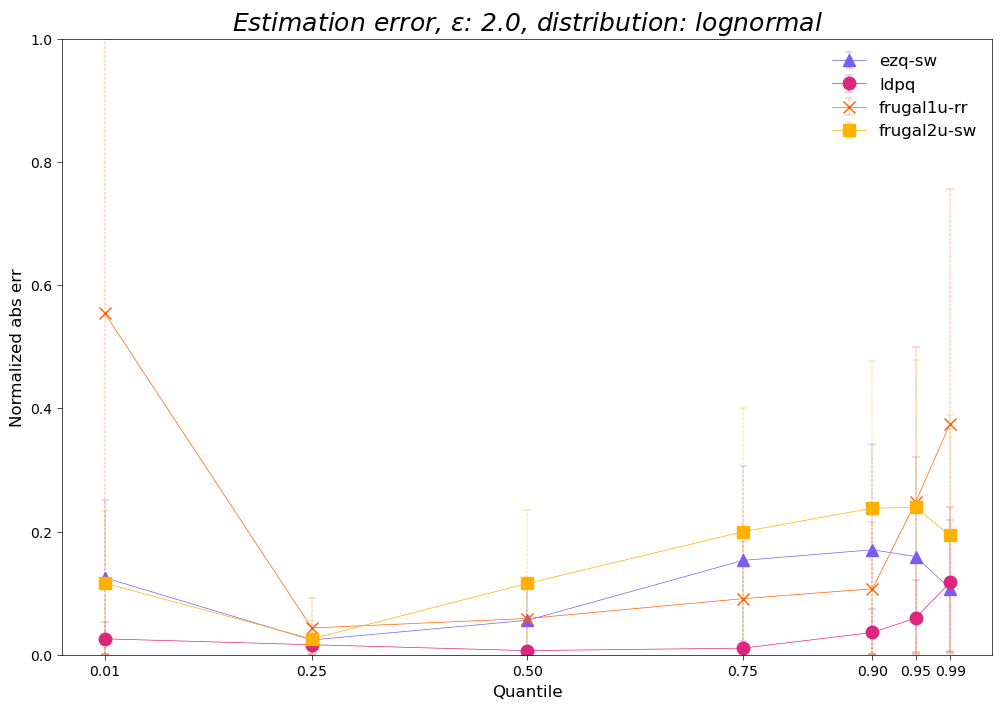

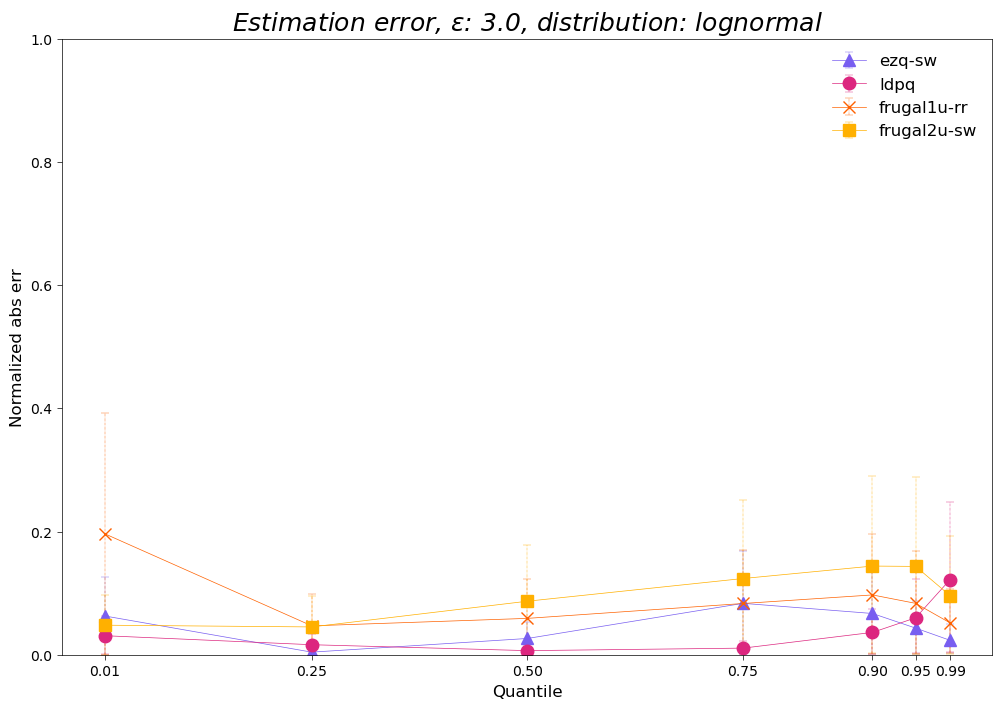

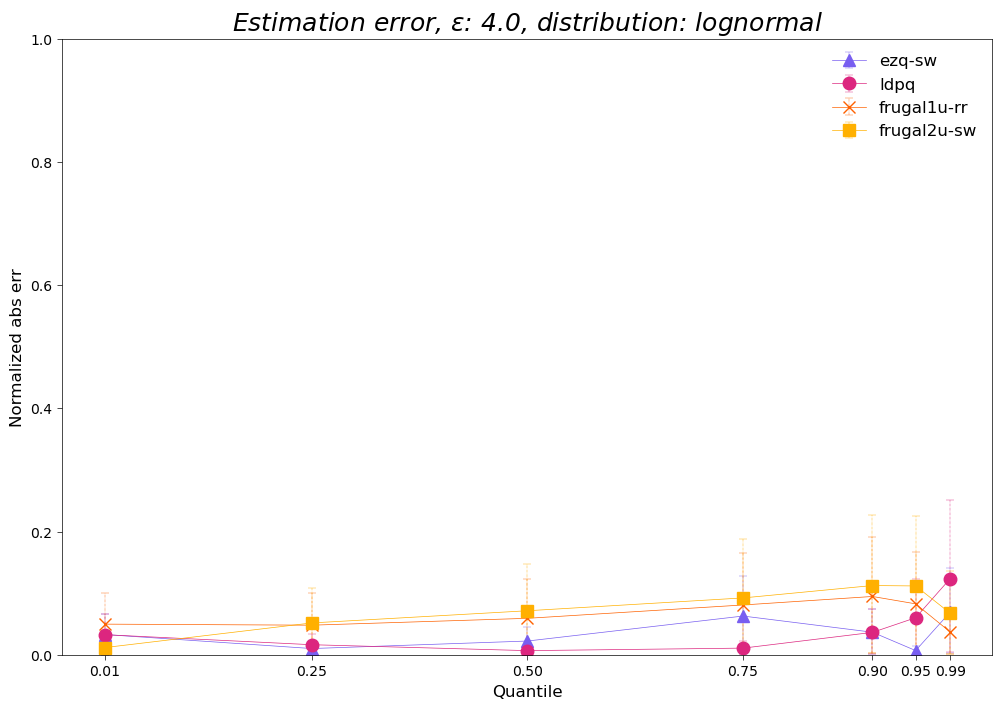

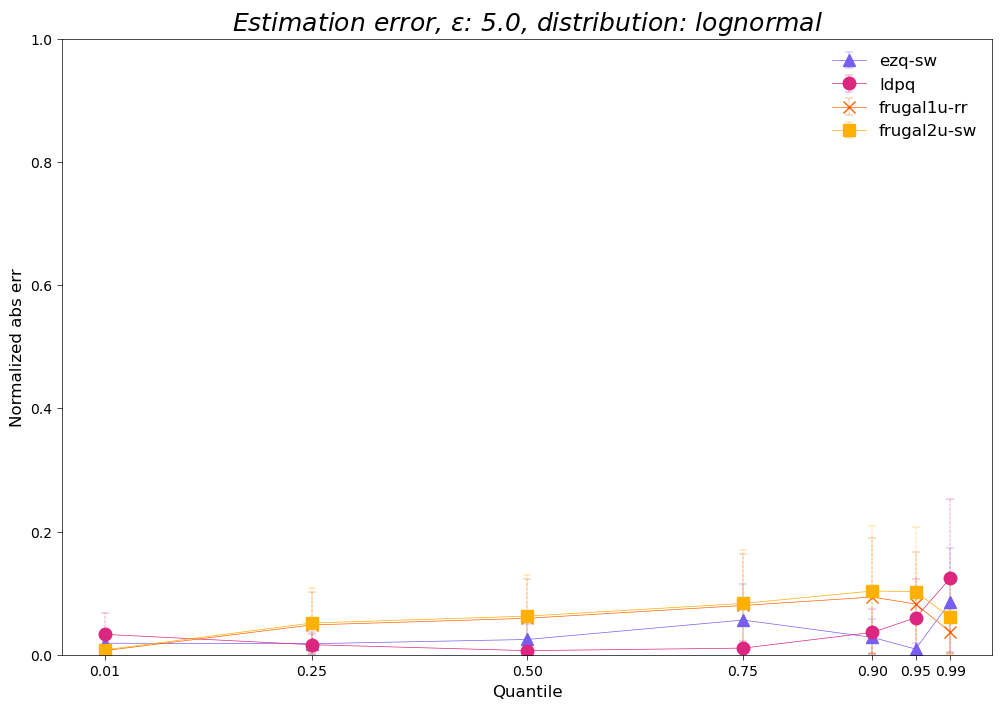

In [12]:
for d in d_values_restrict:
    for i in range(0,5):
        fig, ax = plt.subplots(1,1, figsize=(12,8))
        plot_comp_q(e_default[i], int(d), ax)
        fig.savefig(f'imgs/err_vs_quantile_budget{e_default[i]}_distro{d}.eps', dpi=600)
        plt.show()